<a href="https://colab.research.google.com/github/naajidoe/Norman-Lab/blob/main/Recurrent_XOR_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn  # nn objects
import torch.optim as optim  # nn optimizers
import matplotlib.pyplot as plt

# Set device to gpu if possible
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
input_size = 3  # the number of units in the input layer
fc_hidden_size = 1  # the number of units in the hidden layer
recurrent_hidden_size = 2  # the number of units in the recurrent layer
num_classes = 2  # the number of units in the output layer
sequence_length = 3  # the number of sequences the RNN should run through
batch_size = 4  # batch size = number of samples to average when computing gradient, and always keep this to one
num_layers = 1  # number of stacked RNN layers
eta = 0.001  # learning rate
epochs = 5000  # epochs = # of full pases through dataset

# Load Data (XOR information)
X1 = [0, 1, 0]
X2 = [0, 0, 1]
X0 = [1, 0, 0]
Ya = [1]  # corresponds to "1" case
Yb = [0]  # corresponds to "0" case
Ya1 = [1, 0]  # corresponds to "1" case
Yb1 = [0, 1]  # corresponds to "0" case
# output should be a 1-hot encoded vector but what you're passing in should be an integer which indicates which
# one hot position should be flipped on ([0, #classes])
inputs = torch.tensor([[X1, X1, X0], [X1, X2, X0], [X2, X2, X0], [X2, X1, X0]], dtype=torch.float).to(device)
inputs = inputs.view(batch_size, sequence_length, input_size)
# targets = torch.tensor([Yb, Ya, Yb, Ya], dtype=torch.float).to(device)
targets = torch.tensor([Yb, Ya, Yb, Ya],  dtype=torch.long).to(device)
final_targets = torch.tensor([Yb1, Ya1, Yb1, Ya1], dtype=torch.float).to(device)

class RecurrentXORNet(nn.Module):
    def __init__(self, input_size, fc_hidden_size, recurrent_hidden_size, num_layers,
                 num_classes):  # define fc/reccurent layers
        super().__init__()  # initializes superclass (nn.Module); could also use super(XORNet, self).__init__()
        self.input_size = input_size
        self.fc_hidden_size = fc_hidden_size
        self.recurrent_hidden_size = recurrent_hidden_size
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.fc_hidden_layer = nn.Linear(input_size, fc_hidden_size)  # fc input layer
        self.recurrent_hidden_layer = nn.RNN(fc_hidden_size, recurrent_hidden_size, batch_first=True)
        self.output_layer = nn.Linear(recurrent_hidden_size, num_classes)  # fc output lyaer
        # input must have the sahpe: batch_size, sequence_length, input_size

    def forward(self, x_vec):  # here we have a feedforward nn in which data (i.e. x) goes forward from input to output
        x_first_hidden_vec = torch.tanh(self.fc_hidden_layer(x_vec))  # first, x passes through the fc layer
        h0 = torch.zeros(self.num_layers, batch_size, self.recurrent_hidden_size).to(device)
        #AB# todo: switch to RNNCell
        out, _ = self.recurrent_hidden_layer(x_first_hidden_vec, h0)  # then, x passes through the recurrent layer
        x_recurrent_hidden_vec = out[:, -1, :]  # for the pass to final fc layer we only need the last layer of the RNN
        #AB# todo: remove softmax. x-entropy assumes unnormalized activity. 
        #AB# you can apply softmax for evaluation outside the network forward method
        x_output_int = torch.softmax(self.output_layer(x_recurrent_hidden_vec), dim=1)  # then x passes from recurrent layer to output layer
        return x_output_int

In [ ]:
# Initialize network and our model
net = RecurrentXORNet(input_size, fc_hidden_size, recurrent_hidden_size, num_layers, num_classes).to(device)

# Loss function, optimizer, and schedule (for decaying learning rate)
criterion = nn.CrossEntropyLoss()  # loss function
optimizer = optim.Adam(net.parameters(), eta)  # tells optimizer to adjust all parameter weights
sheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, verbose=True)  # variable learning rate

# Train network - first epoch learns the first batch (0,0), and the second epoch learns the second batch (0,1), etc
mean_losses = []
for epoch in range(epochs):
    losses = []
    optimizer.zero_grad()  # clears the gradient buffer (i.e. sets all the gradients to 0 for each step/batch)
    # note that a step/batch is simply the set of inputs i.e. [1,0] or [0,1] for each run/comparison

    # forward propagation
    output = net(inputs)  # set the prediction/outputs equal to the batch size
    # here we pass the input data batch into the model which will call the forward() method and make the variable
    # 'output' contain the tanh of the neural network for the given batch
    loss = criterion.forward(output, targets.squeeze(1))  # forward propagattes the loss/error
    losses.append(loss)

    # backpropagation
    loss.backward()  # backpropagates the loss/error

    # gradient descent/adam step - updating the weights depending on the gradient computed
    optimizer.step()  # causes the optimizer to take a step based on the gradients of the parameters

    mean_loss = sum(losses) / len(losses)  # calculates mean loss for a particular epoch
    mean_losses.append(mean_loss)
    sheduler.step(mean_loss)
    print(f'Cost at epoch {epoch} is {mean_loss}')

Streaming output truncated to the last 5000 lines.
Cost at epoch 5 is 0.6935174465179443
Cost at epoch 6 is 0.6934852004051208
Cost at epoch 7 is 0.693454384803772
Cost at epoch 8 is 0.6934252381324768
Cost at epoch 9 is 0.693397581577301
Cost at epoch 10 is 0.6933715343475342
Cost at epoch 11 is 0.6933470368385315
Cost at epoch 12 is 0.6933242678642273
Cost at epoch 13 is 0.6933029890060425
Cost at epoch 14 is 0.6932833194732666
Cost at epoch 15 is 0.6932651996612549
Cost at epoch 16 is 0.6932486891746521
Cost at epoch 17 is 0.6932336091995239
Cost at epoch 18 is 0.6932199597358704
Cost at epoch 19 is 0.6932077407836914
Cost at epoch 20 is 0.6931968927383423
Cost at epoch 21 is 0.6931873559951782
Cost at epoch 22 is 0.6931790709495544
Cost at epoch 23 is 0.6931719183921814
Cost at epoch 24 is 0.6931659579277039
Epoch    26: reducing learning rate of group 0 to 1.0000e-04.
Cost at epoch 25 is 0.693160891532898
Cost at epoch 26 is 0.6931567192077637
Cost at epoch 27 is 0.693156361579895

tensor(0.6996, grad_fn=<DivBackward0>)


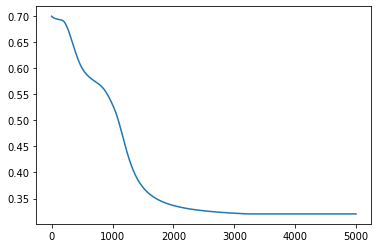

In [ ]:
# Plot mean losses
plt.figure(1)
time = list(range(epochs))
plt.plot(time, mean_losses)
#AB# this loss should be zero
print(mean_losses[0])
plt.show()

In [ ]:
# Test network
test = net(inputs)
print("input is {}".format(inputs.detach().numpy()))
print('out is {}'.format(torch.round(test).detach().numpy()))
print('expected out is {}'.format(final_targets.detach().numpy()))

input is [[[0. 1. 0.]
  [0. 1. 0.]
  [1. 0. 0.]]

 [[0. 1. 0.]
  [0. 0. 1.]
  [1. 0. 0.]]

 [[0. 0. 1.]
  [0. 0. 1.]
  [1. 0. 0.]]

 [[0. 0. 1.]
  [0. 1. 0.]
  [1. 0. 0.]]]
out is [[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]
expected out is [[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]
